In [4]:
import numpy as np
import pandas as pd

#read in the data, lets look at it
data = pd.DataFrame.from_csv("DtcDrugTargetInteractions.csv", index_col = None)


C:\Users\Ben\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (1,3,8,21,25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
#drop some useless columns
data = data.drop(['journal','title','doc_type','annotation_comments','ep_action_mode','assay_format','assaytype',
                  'assay_subtype','inhibitor_type','detection_tech','assay_cell_line','compound_concentration_value',
                  'compound_concentration_value_unit','substrate_type','substrate_relation','substrate_value',
                  'substrate_units', 'synonym', 'wildtype_or_mutant', 'mutation_info', 'assay_description', 'target_pref_name',
                  'compound_name', 'standard_relation', 'pubmed_id'], axis = 1)
list(data)

['compound_id',
 'standard_inchi_key',
 'target_id',
 'gene_names',
 'standard_type',
 'standard_value',
 'standard_units']

In [6]:
data

,compound_id,standard_inchi_key,target_id,gene_names,standard_type,standard_value,standard_units
0,CHEMBL3545284,NaN,NaN,NaN,IC50,6.00,NM
1,CHEMBL3545284,NaN,NaN,NaN,IC50,6.00,NM
2,CHEMBL3545284,NaN,NaN,NaN,IC50,4.00,NM
3,CHEMBL3545284,NaN,NaN,NaN,KDAPP,403.14,NM
4,CHEMBL3545284,NaN,NaN,NaN,IC50,42.00,NM
5,CHEMBL3545284,NaN,NaN,NaN,KDAPP,15518.33,NM
6,CHEMBL3545284,NaN,NaN,NaN,KDAPP,25028.57,NM
7,CHEMBL3545284,NaN,NaN,NaN,IC50,51.00,NM
8,CHEMBL3545284,NaN,NaN,NaN,IC50,5.00,NM
9,CHEMBL3545284,NaN,NaN,NaN,IC50,18.00,NM


In [7]:
#ok now time to filter out some of the data based on what's important

#create a data set based on the Kd values - this is what we are trying to predict
data_kd = data[data['standard_type'].isin(['KD', 'Kd'])]
#remove rows where there is no compound information - I will use this to identify compounds
data_kd = data_kd.dropna(subset = ['compound_id'], how = 'any')
#remove rows where there is no target id - I will use this to identify proteins
data_kd = data_kd.dropna(subset = ['target_id'], how = 'any')
#remove rows where there is no enzyme information
data_kd = data_kd.dropna(subset = ['target_id'], how = 'all')
#remove any rows where there is more than 1 target per line
data_kd = data_kd[data_kd['target_id'].map(len) < 7]
#filter out any units that are not in NM so everything is the same
data_kd = data_kd[data_kd['standard_units'] == 'NM']

#remove the inchi_key and gene names i'm not using those
data_kd = data_kd.drop(['standard_inchi_key', 'gene_names'], axis = 1)

data_kd = data_kd.reset_index(drop = True)
data_kd.head()

,compound_id,target_id,standard_type,standard_value,standard_units
0,CHEMBL135581,P00374,KD,0.5,NM
1,CHEMBL135581,P00374,KD,0.6,NM
2,CHEMBL135581,P00374,KD,450.0,NM
3,CHEMBL135581,P00374,KD,1000.0,NM
4,CHEMBL135581,P00374,KD,1200.0,NM


In [8]:
#get a set of all the target ids
all_ids = data_kd['target_id'].tolist()
id_set = set()
for i in all_ids:
    id_set.add(i)
    
#convert the set to a dataframe and give to a csv
id_list = list(id_set)
mapping = {'id': id_list}
df_ids = pd.DataFrame(mapping)
df_ids['id'].to_csv('protein_ids1.csv', index = False)
#df_ids['id']

In [9]:
#output from csv
#if no domains take first 300 AAs, if domain in (Protein kinase, Protein kinase 1, PI3K/PI4K) take subsection, else take longest
#no duplicates allowed, just take the first

#final dict mapping enzyme entries to their sequence of up to 300 AAs
final_dict = {}

#read in all the data
df_proteins = pd.DataFrame.from_csv("uniprot_data.csv", index_col = None)

#first filter out the NaN data by adding to dict first 300 AAs 
df_proteins_nan = df_proteins[df_proteins.isnull().any(axis = 1)]
df_proteins_nan = df_proteins_nan.reset_index(drop = True)
df_proteins_nan
for i in range(len(df_proteins_nan)):
    sequence = df_proteins_nan['Sequence'][i]
    #take the first 300 AAs
    if len(sequence) > 300:
        sequence = sequence[0:300]
    final_dict[df_proteins_nan['Entry'][i]] = sequence
    
#then remove the NaN data
df_proteins_domains = df_proteins.dropna(subset = ['Domain [FT]'], how = 'all')
df_proteins_domains = df_proteins_domains.reset_index(drop = True)
df_proteins_domains
#parse the domains into the format {domain name : (start, end)}
domains = df_proteins_domains['Domain [FT]'].tolist()

def get_domain(string):
    x = string.split('; ')
    y = [s[7:] for s in x]
    z = [s.split(' ', 2) for s in y]
    d = {}
    for lst in z:
        if len(lst) > 2:
            tup = (lst[0], lst[1])
            dom = lst[2].split('.', 1)[0]
            d[dom] = tup
    return d

#encode each domain as a dict mapping to tuples (start, end) - use start-end to get length if needed
domains_dicts = [get_domain(s) for s in domains]
for i, d in enumerate(domains_dicts):
    sequence = df_proteins_domains['Sequence'][i]
    if len(d) == 0:
        if len(sequence) > 300:
            sequence = sequence[0:299]
        final_dict[df_proteins_domains['Entry'][i]] = sequence
    elif 'Protein kinase' in d:
        start, end = d['Protein kinase']
        x = int(start)
        y = int(end)
        if (y - x) > 300:
            y = x + 300
        final_dict[df_proteins_domains['Entry'][i]] = sequence[x - 1: y - 1]
    elif 'Protein kinase 1' in d:
        start, end = d['Protein kinase 1']
        x = int(start)
        y = int(end)
        if (y - x) > 300:
            y = x + 300
        final_dict[df_proteins_domains['Entry'][i]] = sequence[x - 1: y - 1]
    elif 'PI3K/PI4K' in d:
        start, end = d['PI3K/PI4K']
        x = int(start)
        y = int(end)
        if (y - x) > 300:
            y = x + 300
        final_dict[df_proteins_domains['Entry'][i]] = sequence[x - 1: y - 1]
    else:
        newd = {}
        for key, value in d.items():
            #there's one weird entry just deal with it
            try:
                start = int(value[0])
                end = int(value[1])
                newd[key] = end - start
            except ValueError:
                continue
        maxkey = max(newd, key = newd.get)
        start, end = d[maxkey]
        x = int(start)
        y = int(end)
        if (y - x) > 300:
            y = x + 300
        final_dict[df_proteins_domains['Entry'][i]] = sequence[x - 1: y - 1]
#len(final_dict)  
#final_dict

In [10]:
#drop data whose target ids aren't in the final dictionary
#make a new column
data_kd['prot_sequence'] = np.nan

def is_in(some_df):
    if some_df['target_id'] in final_dict:
        return final_dict[some_df['target_id']]
    else:
        return np.nan
data_kd['prot_sequence'] = data_kd.apply(is_in, axis = 1)
data_kd = data_kd.dropna(subset = ['target_id'], how = 'all')
data_kd = data_kd.reset_index(drop = True)
data_kd.head()

,compound_id,target_id,standard_type,standard_value,standard_units,prot_sequence
0,CHEMBL135581,P00374,KD,0.5,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...
1,CHEMBL135581,P00374,KD,0.6,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...
2,CHEMBL135581,P00374,KD,450.0,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...
3,CHEMBL135581,P00374,KD,1000.0,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...
4,CHEMBL135581,P00374,KD,1200.0,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...


In [11]:
#amino acid one hot encoding
AA_dict = {'G': 0, 'A': 1, 'L': 2, 'M': 3, 'F': 4, 'W': 5, 'K': 6, 'Q': 7, 'E': 8, 'S': 9, 
          'P': 10, 'V': 11, 'I': 12, 'C': 13, 'Y': 14, 'H': 15, 'R': 16, 'N': 17, 'D': 18, 'T': 19, 'X': 20}

In [12]:
#ok now that we have cleaned the data on the protein side, it's time to extract important features of the molecules
#there are 4 parts associated with the molecules - compound_id, standard_inchl_key, standard_inchl, SMILES
#NCBI has a service to get each of these features from the other. I will use the pubchem id to convert 
#to smiles
ids = data_kd['compound_id'].tolist()
id_set2 = set()
for i in ids:
    id_set2.add(i)
    
#convert the set to a dataframe and give to a csv
id_list2 = list(id_set2)
mapping2 = {'id': id_list2}
df_ids2 = pd.DataFrame(mapping2)
df_ids2['id'].to_csv('id_to_smiles_final.csv', index = False)

#data_kd['compound_id'].to_csv('id_to_smiles1.csv', index = False)

In [13]:
#read in the file and create a dict mapping key to SMILES
smiles_dict = {}
df_smiles = pd.DataFrame.from_csv('smiles_final.csv', index_col = None)
for i, val in enumerate(df_smiles['id'].tolist()):
    smiles_dict[val] = df_smiles['smiles'][i]

#make a new column for the smiles data in the dataframe
data_kd['smiles_sequence'] = np.nan

def is_in2(some_df):
    if some_df['compound_id'] in smiles_dict:
        return smiles_dict[some_df['compound_id']]
    else:
        return np.nan
data_kd['smiles_sequence'] = data_kd.apply(is_in2, axis = 1)
data_kd = data_kd.dropna(subset = ['smiles_sequence'], how = 'all')
data_kd = data_kd.reset_index(drop = True)
data_kd.head()

,compound_id,target_id,standard_type,standard_value,standard_units,prot_sequence,smiles_sequence
0,CHEMBL135581,P00374,KD,0.5,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...,CCCN1C(=CC=C2C1=NC(NC2=O)N)C
1,CHEMBL135581,P00374,KD,0.6,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...,CCCN1C(=CC=C2C1=NC(NC2=O)N)C
2,CHEMBL135581,P00374,KD,450.0,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...,CCCN1C(=CC=C2C1=NC(NC2=O)N)C
3,CHEMBL135581,P00374,KD,1000.0,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...,CCCN1C(=CC=C2C1=NC(NC2=O)N)C
4,CHEMBL135581,P00374,KD,1200.0,NM,SLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQN...,CCCN1C(=CC=C2C1=NC(NC2=O)N)C


In [14]:
#save the final data
data_kd.to_csv('all_data.csv', index = False)

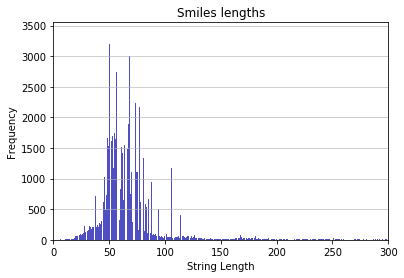

In [15]:
#plot the distribution of SMILES lengths - how long is the average character sequence of the chemicals
import matplotlib.pyplot as plt
smiles_strings = data_kd['smiles_sequence'].tolist()
string_lengths = [len(x) for x in smiles_strings]

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=string_lengths, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 300)
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Smiles lengths')
plt.show()
#seems like most of the small molecules are < 85 in length, I will use this as my kernel size limit
#updated need 300 to have kernels same size for pooling

In [16]:
#what are the most frequent characters that appear in the strings

#replace strings with their number of hydrogen: no L, K, e, i, P, r, B, I
from collections import Counter
char_freqs = {}
for string in smiles_strings:
    for s in string:
        if s in char_freqs.keys():
            char_freqs[s] += 1
        else:
            char_freqs[s] = 1
#remove some so the kernels are the same size
to_remove = {'1', '2', '3', '4', '5', '6', '7', '8', '9', 'L', 'K', 'e', 'i', 'P', 'r', 'I'}
for k in to_remove:
    del char_freqs[k]
    
#sort the characters in order
char_freqs = sorted(char_freqs, key = char_freqs.get, reverse = True)
#create a mapping from string to index
char_freqs_mapping = {}
for i, value in enumerate(char_freqs):
    char_freqs_mapping[value] = i
char_freqs_mapping

{'#': 15,
 '(': 2,
 ')': 3,
 '+': 17,
 '-': 18,
 '.': 16,
 '/': 13,
 '=': 1,
 '@': 6,
 'B': 20,
 'C': 0,
 'F': 10,
 'H': 9,
 'N': 4,
 'O': 5,
 'S': 11,
 '[': 7,
 '\\': 14,
 ']': 8,
 'a': 19,
 'l': 12}